In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
df = pd.read_csv("bangalore house price prediction OHE-data.csv")

In [3]:
house = pd.read_csv("Bengaluru_House_Data.csv")
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [70]:
house.drop("availability", axis=1, inplace=True)
house.drop("society", axis=1, inplace=True)

In [75]:
house['size'].unique()
house['bhk'] = house['size'].apply(lambda x: x.split(" ")[0]).astype(int)

In [76]:
house.drop("size", axis=1, inplace=True)

In [88]:
house.location.value_counts()[:12].index

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Hebbal', 'Raja Rajeshwari Nagar',
       'Hennur Road', 'Electronic City Phase II', 'Bannerghatta Road',
       'Uttarahalli'],
      dtype='object', name='location')

In [84]:
for count in house.location.value_counts():
    if count>=100:
        print(count)
    

397
310
236
216
212
160
151
135
122
119
108
103


In [27]:
house.dropna(inplace=True)

In [78]:
encoded = pd.get_dummies(house,dtype=int)
encoded

,bath,balcony,price,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Banaswadi,location_ Bhoganhalli,...,total_sqft_986,total_sqft_987,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_999
0,2.0,1.0,39.07,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.0,38.00,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,5.0,3.0,295.00,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,2.0,1.0,57.00,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13314,3.0,3.0,112.00,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,4.0,0.0,231.00,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2.0,1.0,60.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split Data

In [39]:
X = encoded.drop('price', axis=1)
y = encoded['price']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7496, 5003)
Shape of y =  (7496,)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4545)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5247, 5003)
Shape of y_train =  (5247,)
Shape of X_test =  (2249, 5003)
Shape of y_test =  (2249,)


### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [4]:
# training
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
print(f"Training score: {r2_score(y_train,y_pred_train)}")

NameError: name 'LinearRegression' is not defined

In [56]:
y_pred_test = model.predict(X_test)
print(f"Training score: {r2_score(y_test,y_pred_test)}")

Training score: -1.983242240847532e+27
Absolute error: 1344846272749355.2


## Polynomial Linear Regression - ML Model Training

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [57]:
d = pd.DataFrame({"age":[23,34,12,34,23,35],
                  'height':[5.4,5.6,5,6,4,4.5]})
d

,age,height
0,23,5.4
1,34,5.6
2,12,5.0
3,34,6.0
4,23,4.0
5,35,4.5


In [68]:
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(d)
td = poly_reg.transform(d)
columns = poly_reg.get_feature_names_out()
df  = pd.DataFrame(data=td, columns=columns)
df

,1,age,height,age^2,age height,height^2,age^3,age^2 height,age height^2,height^3
0,1.0,23.0,5.4,529.0,124.2,29.16,12167.0,2856.6,670.68,157.464
1,1.0,34.0,5.6,1156.0,190.4,31.36,39304.0,6473.6,1066.24,175.616
2,1.0,12.0,5.0,144.0,60.0,25.00,1728.0,720.0,300.00,125.000
3,1.0,34.0,6.0,1156.0,204.0,36.00,39304.0,6936.0,1224.00,216.000
4,1.0,23.0,4.0,529.0,92.0,16.00,12167.0,2116.0,368.00,64.000
5,1.0,35.0,4.5,1225.0,157.5,20.25,42875.0,5512.5,708.75,91.125


In [69]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

MemoryError: Unable to allocate 490. GiB for an array with shape (5247, 12522510) and data type float64

In [21]:
X_train_poly.shape, X_test_poly.shape

((5696, 5886), (1424, 5886))

In [22]:
lr = LinearRegression()

lr.fit(X_train_poly, y_train)

LinearRegression()

In [23]:
lr.score(X_train_poly, y_train)

1.0

In [24]:
lr.score(X_test_poly, y_test,)

0.9982416645763975

In [25]:
lr.predict([X_test_poly[0,:]])

array([80.])

In [18]:
y_pred = lr.predict(X_test_poly)
y_pred

array([ 80.,  40., 120., ...,  32.,  63., 180.])

In [19]:
y_test

2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse

(35.33012274012277, 5.9439147655499545)

# Simple Linear Regression on same Data 

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
lr.score(X_train,y_train)

0.8655498398662171

In [23]:
lr.score(X_test,y_test)

0.7903837092682253

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

# Generating random data 
 - # y = 0.8x^2 + 0.9x + 2

In [25]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

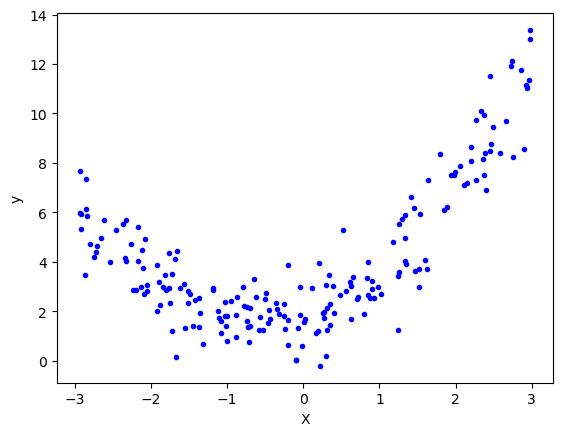

In [26]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [27]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
# Applying linear regression
lr = LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.27978316748730225

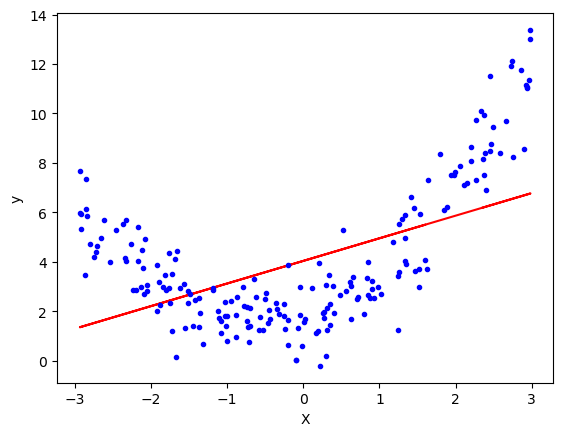

In [31]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


# Applying Polynomial Linear Regression
### degree 2

In [32]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [33]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
print(X_train[0])
print(X_train_trans[0])

[1.59722162]
[1.         1.59722162 2.55111689]


In [34]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [35]:
y_pred = lr.predict(X_test_trans)

In [36]:
r2_score(y_test,y_pred)

0.8588494923045243

In [37]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.87290752 0.81360571]]
[1.88823876]


In [38]:
# generating testing data
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


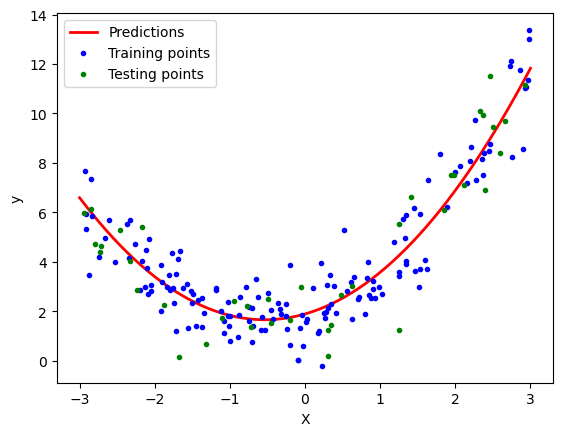

In [39]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [40]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

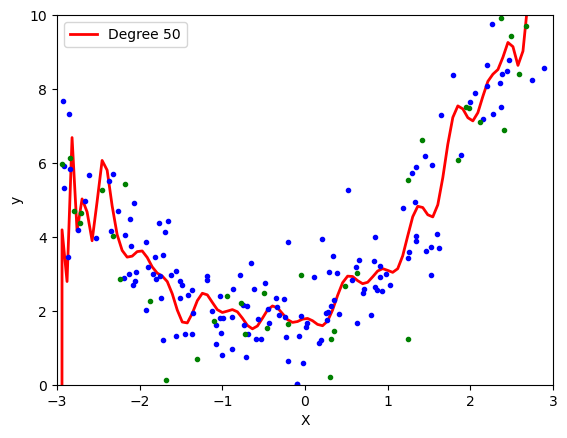

In [41]:
polynomial_regression(50)

In [42]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

C:\Users\Nasir Hussain\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


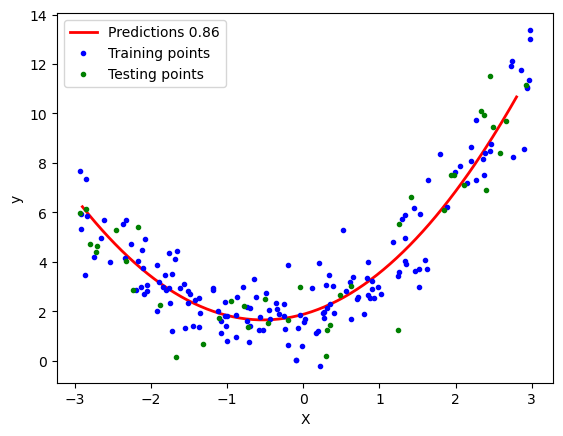

In [43]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [44]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [1]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [2]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

NameError: name 'LinearRegression' is not defined

In [3]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

ModuleNotFoundError: No module named 'plotly'

In [68]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [69]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [71]:
X_multi_trans.shape

(100, 496)

In [72]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [73]:
X_test_multi = poly.transform(final)

In [74]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [75]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()